In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [271]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
print(data[:5])

    mpg  cyl  displ     hp  weight  accel  model  origin  \
0  18.0    8  307.0  130.0  3504.0   12.0     70       1   
1  15.0    8  350.0  165.0  3693.0   11.5     70       1   
2  18.0    8  318.0  150.0  3436.0   11.0     70       1   
3  16.0    8  304.0  150.0  3433.0   12.0     70       1   
4  17.0    8  302.0  140.0  3449.0   10.5     70       1   

                       carname  
0  "chevrolet chevelle malibu"  
1          "buick skylark 320"  
2         "plymouth satellite"  
3              "amc rebel sst"  
4                "ford torino"  


In [272]:
cars=np.array(data[["cyl","mpg","displ","hp","weight","accel"]])
cars=np.array([line for line in cars if line[0] in [4,6,8]])
Y=cars[:,0]/2-2
X=cars[:,1:]

In [273]:
from sklearn import tree

In [274]:
from sklearn.model_selection import train_test_split
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)

In [276]:
DT=tree.DecisionTreeClassifier(max_depth=3)# # min_samples_split=5, min_samples_leaf=5, max_features="auto", 
                              #min_impurity_decrease=.0001)
DT.fit(XTRAIN, YTRAIN)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [277]:
YP=DT.predict(XTEST)

In [278]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [279]:
print(confusion_matrix(YTEST,YP))
print("accuracy = ",accuracy_score(YTEST,YP))

[[46  0  0]
 [ 2 23  0]
 [ 0  0 26]]
accuracy =  0.979381443298969


In [280]:
import graphviz

In [288]:
dot_data = tree.export_graphviz(DT, out_file=None, rotate=False, 
            feature_names=["mpg","displ","hp","weight","accel"],
            class_names=list(map(str,[4,6,8])),
 filled=True, rounded=True, special_characters=True)
  

In [289]:
#graph=graphviz.Source(dot_data)

In [290]:
import pydotplus

In [291]:
graph2 = pydotplus.graph_from_dot_data(dot_data)  


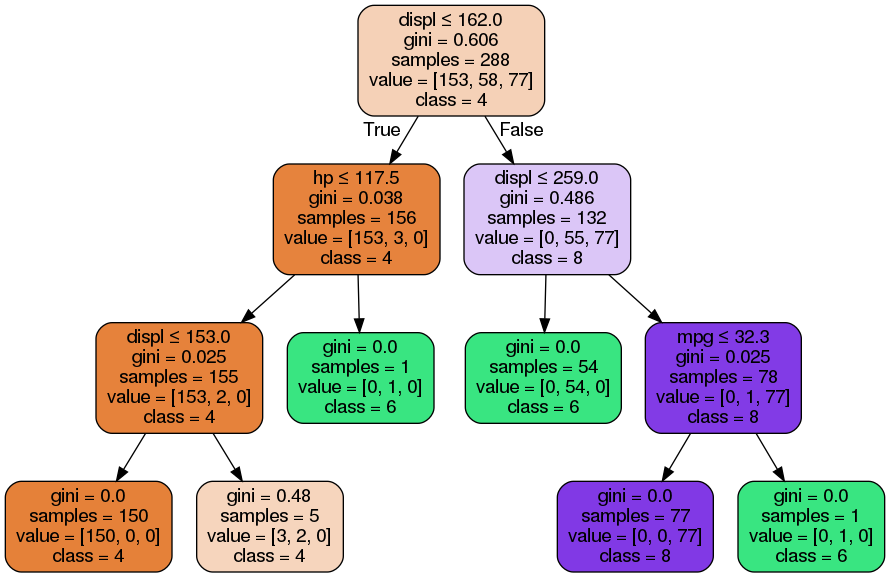

In [292]:
from IPython.display import Image
Image(graph2.create_png())

In [293]:
graph2.write_pdf("Decision-Tree-Cylinders-Depth-3.pdf")

True

## Repeat in 2 dimensions

In [320]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca=PCA(n_components=2)
pca.fit(X)
comps=pca.components_
explain=pca.explained_variance_ratio_
for comp, frac in zip(comps,explain):
    print(round(100*frac,5),"percent:", comp)
P=pca.transform(X)
scaler = MinMaxScaler()
Q=scaler.fit_transform(P)

XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(Q,Y)
DT.fit(XTRAIN, YTRAIN)
YP=DT.predict(XTEST)
print(confusion_matrix(YTEST,YP))
print("accuracy (PCA Frame) = ",accuracy_score(YTEST,YP))

99.76511 percent: [-0.0076786   0.11404841  0.03920751  0.99267056 -0.00138875]
0.19845 percent: [-0.01797915  0.94308579  0.30724002 -0.1206763  -0.03614883]
[[45  2  0]
 [ 4 17  1]
 [ 0  2 26]]
accuracy (PCA Frame) =  0.9072164948453608


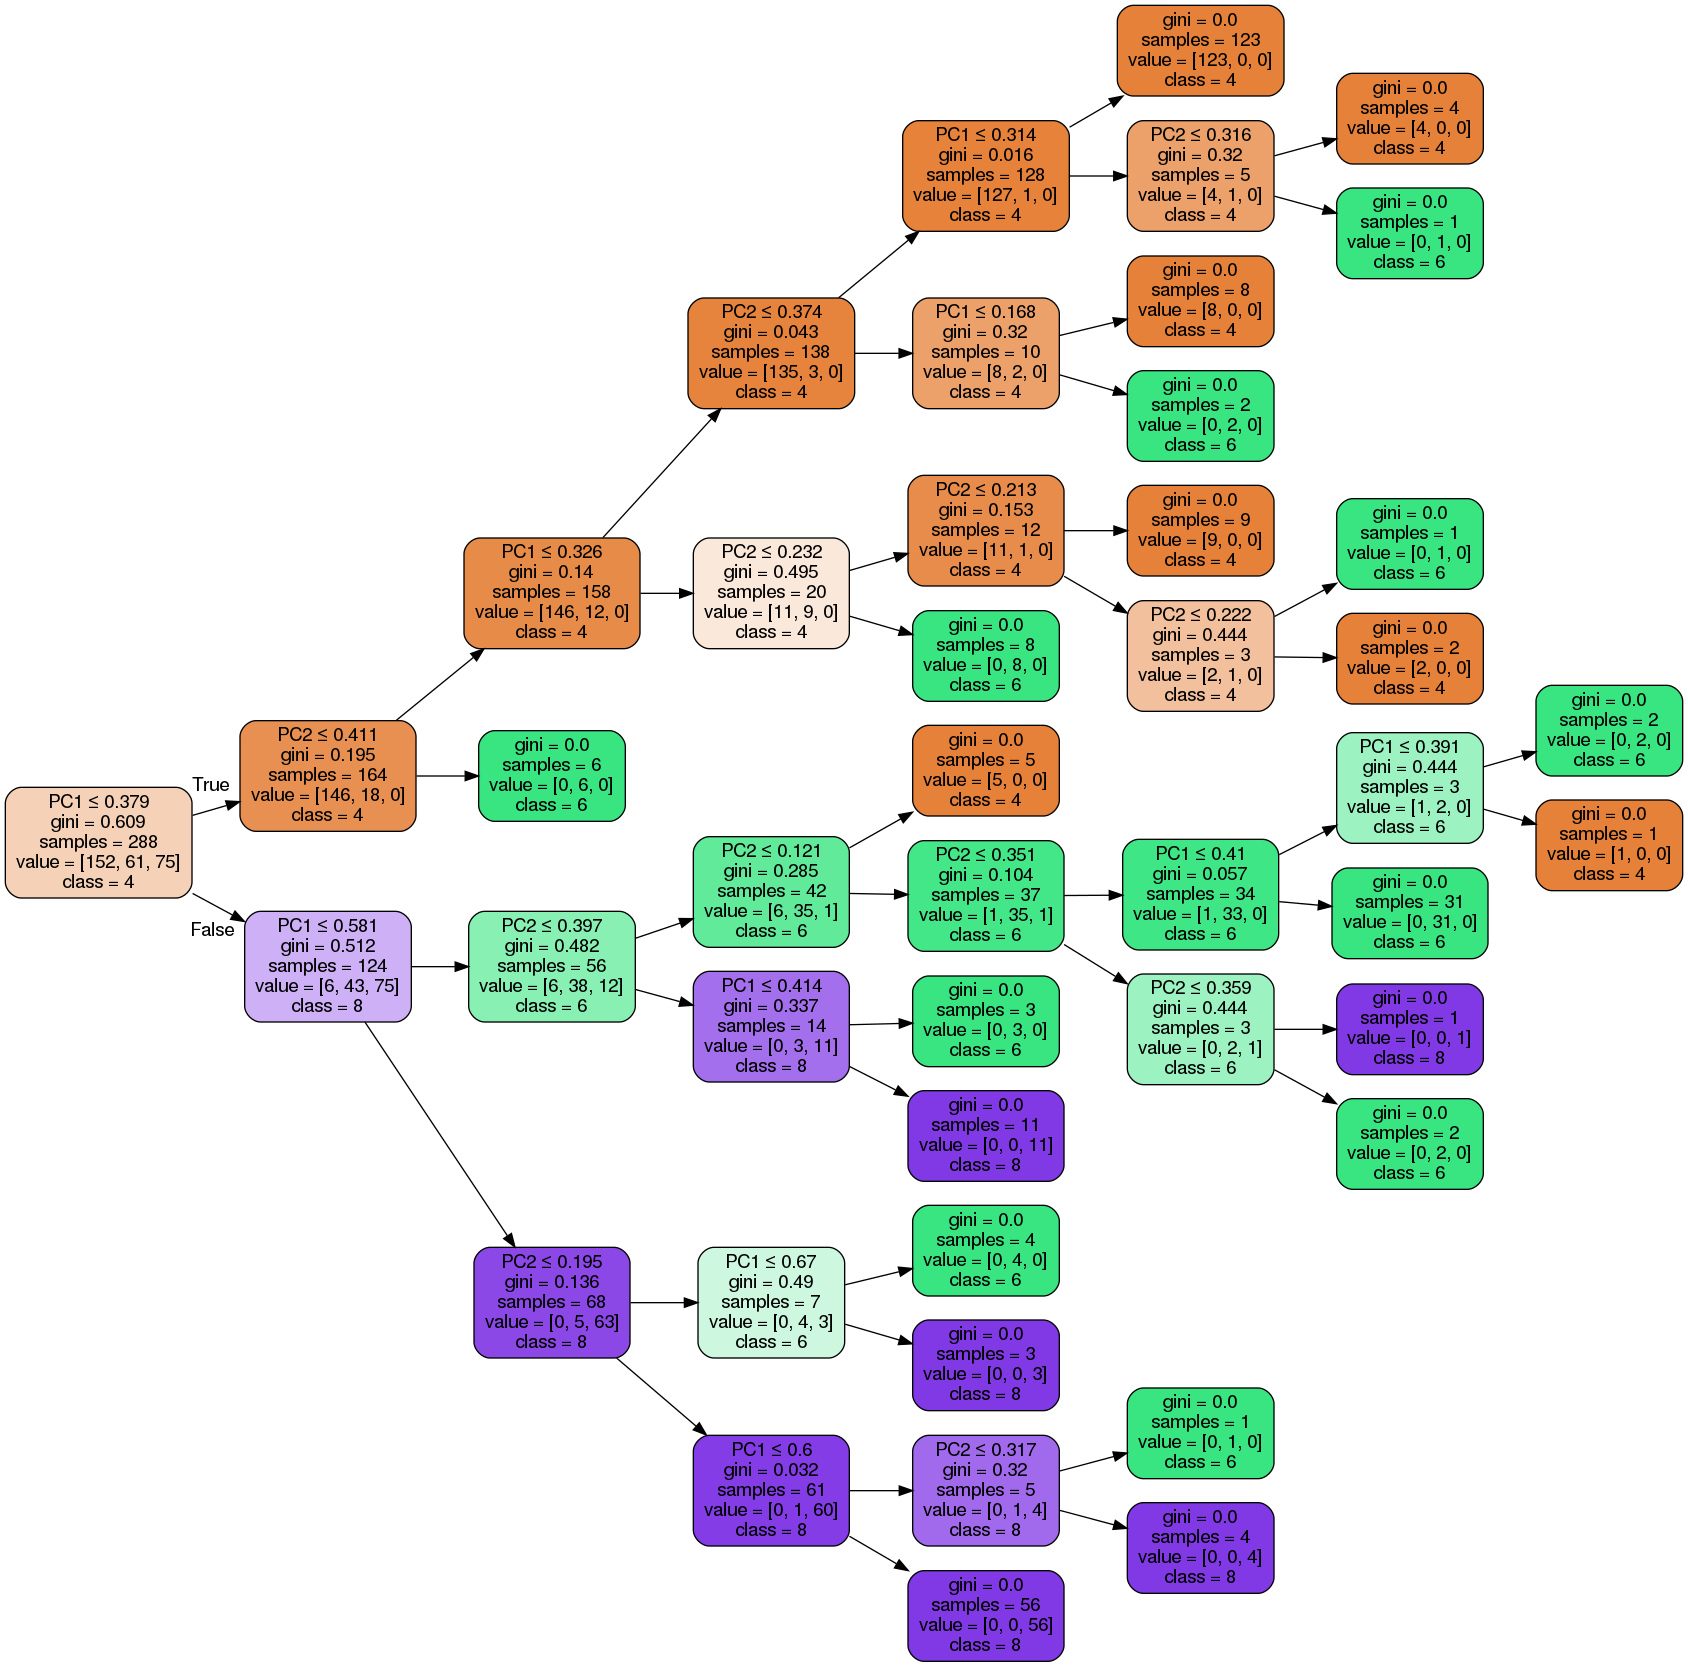

In [321]:
dot_data_PCA = tree.export_graphviz(DT, out_file=None, rotate=True, 
            feature_names=["PC1","PC2"],
            class_names=list(map(str,[4,6,8])),
 filled=True, rounded=True, special_characters=True)
graphPC = pydotplus.graph_from_dot_data(dot_data_PCA)  
Image(graphPC.create_png())

In [322]:
graphPC.write_pdf("Decision-Tree-Cylinders-Princ-Components.pdf")

True

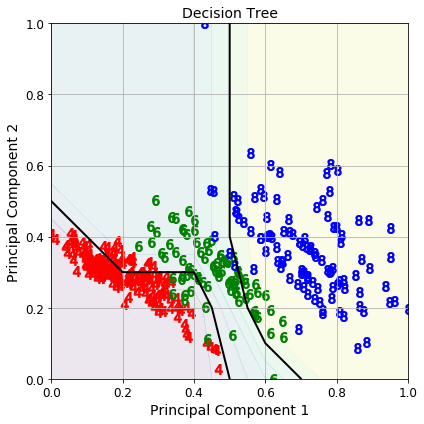

In [325]:
def visualize_PC(ax,clf,X,Y,DX,DY,thelevels,colors,markers,xlab="X",
                                ylab="Y", axtitle="Classification Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, DX),
                     np.arange(y_min, y_max, DY))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    c=ax.contour(xx, yy, Z, alpha=1,levels=thelevels,linewidths=2,colors="k")
    c=ax.contourf(xx, yy, Z, alpha=.1)
        
    nclasses=len(colors)
    for i in range(nclasses):
        xyvals=[(x,y) for (x,y,theclass) in zip(X[:,0],X[:,1],Y) if theclass==i]
        x,y=zip(*xyvals)
        ax.scatter(x,y,marker=markers[i],color=colors[i],s=100)


    ax.set_xlabel(xlab,fontsize=14)
    ax.set_ylabel(ylab,fontsize=14)
    ax.set_title(axtitle,fontsize=14)
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    ax.grid()
    return(ax)
    
colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]

fig,ax=plt.subplots(nrows=1,ncols=1,sharex=True,sharey=True)

visualize_PC(ax,DT, Q,Y, .2, .2,[0.5,1.5],colors,markers,xlab="Principal Component 1",
            ylab="Principal Component 2",axtitle="Decision Tree")
#visualize_PC(ax[0,1],svmp, Q,Y, .01, .01,[0.5,1.5],colors,markers,xlab="Principal Component 1",
#            ylab="Principal Component 2",axtitle="SVM Polynomial Kernel")
#visualize_PC(ax[1,0],svm_RBF, Q,Y,.01, .01,[0.5,1.5],colors,markers,xlab="Principal Component 1",
#            ylab="Principal Component 2",axtitle="SVM Radial Basis Function Kernel")
#visualize_PC(ax[1,1],svm_Sigmoid, Q,Y,.01, .01,[0.5,1.5],colors,markers,xlab="Principal Component 1",
#            ylab="Principal Component 2",axtitle="SVM Sigmoid Kernel")

ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

fig.set_size_inches(6, 6)
fig.tight_layout()
fig.savefig("Decision-Tree-PCA-Decision-Boundary.pdf")


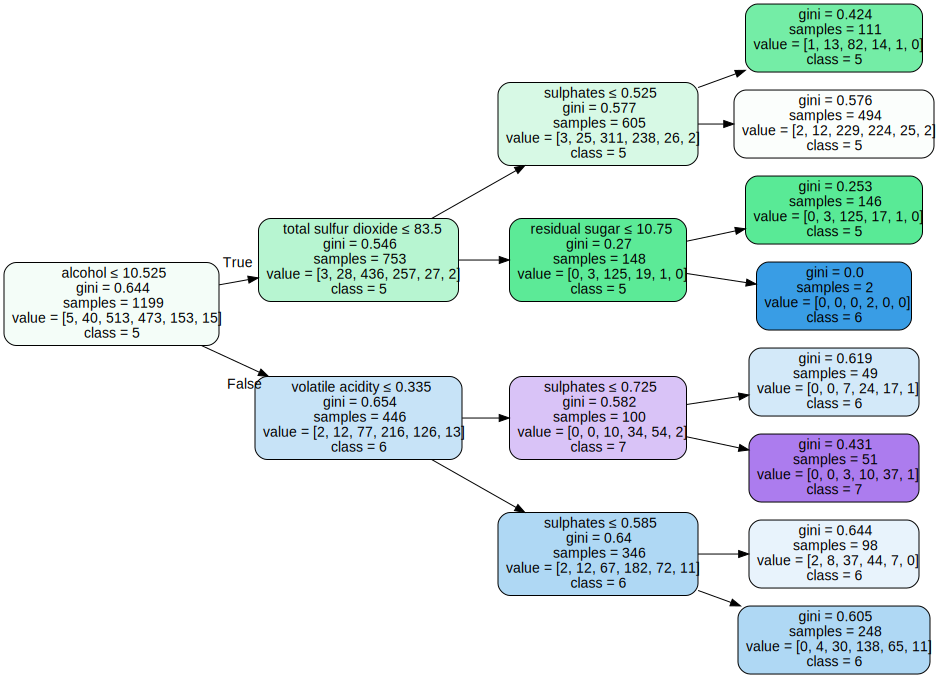

In [328]:
graph